# **PRACTICE 1 - ML WITH `sklearn`**

Work on the Adults dataset, applying all you know about ML to get the best possible predictor.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.read_csv("C:/Users/emili/Downloads/Term 2/Datathon/train_test.csv")

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968876 entries, 0 to 968875
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   st_flight_id                968876 non-null  object 
 1   st_departure_airport        968876 non-null  object 
 2   st_arrival_airport          968876 non-null  object 
 3   st_departure_city           926407 non-null  object 
 4   st_arrival_city             926401 non-null  object 
 5   st_departure_country        926407 non-null  object 
 6   st_arrival_country          926401 non-null  object 
 7   st_route_group              968749 non-null  object 
 8   st_route_subgroup           968749 non-null  object 
 9   dt_flight_date              968876 non-null  int64  
 10  qt_departure_local_time     968876 non-null  int64  
 11  qt_arrival_local_time       968876 non-null  int64  
 12  qt_flight_duration          968876 non-null  int64  
 13  qt_month_depar

In [4]:
data.head()

,st_flight_id,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,...,Lof_ID,FN_NUMBER,Flight_n,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,20230729FR7541,BCN,MXP,Barcelona,Milan,Spain,Italy,CITY,ESPT-IT,20230729,...,2023.07.29_12AL38Q,7541,FR7541,10.0,2.0,2.0,0.0,0.0,0.0,0.0
1,20230301FR5070,DUB,CPH,Dublin,Copenhagen,Ireland,Denmark,CITY,IE CITY,20230301,...,2023.03.01_206FR738,5070,FR5070,-8.0,2.0,2.0,0.0,0.0,1.0,0.0
2,20221026FR5044,VNO,LBA,Vilnius,Leeds,Lithuania,United Kingdom,CITY,LON CITY,20221026,...,2022.10.26_348FR738,5044,FR5044,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,20230906FR7197,FCO,PMI,Rome,Manacor,Italy,Spain,LEISURE,S EUR LEISURE,20230906,...,2023.09.06_8AL73Q,7197,FR7197,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20230202FR4008,SVQ,RAK,Seville,Marrakech,Spain,Morocco,ETHNIC,MOROCCO LATE,20230202,...,2023.02.02_159FR738,4008,FR4008,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for column in data.columns:
    unique_count = data[column].nunique()
    print(f"Number of unique values for column {column}: {unique_count}")
    print("------")

Number of unique values for column st_flight_id: 968876
------
Number of unique values for column st_departure_airport: 242
------
Number of unique values for column st_arrival_airport: 245
------
Number of unique values for column st_departure_city: 196
------
Number of unique values for column st_arrival_city: 197
------
Number of unique values for column st_departure_country: 33
------
Number of unique values for column st_arrival_country: 33
------
Number of unique values for column st_route_group: 6
------
Number of unique values for column st_route_subgroup: 46
------
Number of unique values for column dt_flight_date: 391
------
Number of unique values for column qt_departure_local_time: 22
------
Number of unique values for column qt_arrival_local_time: 23
------
Number of unique values for column qt_flight_duration: 165
------
Number of unique values for column qt_month_departure: 12
------
Number of unique values for column qt_dayofweek_departure: 7
------
Number of unique val

### Removal of variables

In [6]:
data["st_route_group"].describe()

count     968749
unique         6
top         CITY
freq      305598
Name: st_route_group, dtype: object

In [7]:
#from sklearn.preprocessing import LabelEncoder
# Assuming data is your DataFrame
# Create a new variable that indicates whether the education level is in the desired range
#data["education_1th-9th"] = data["education"].isin(["1st-4th", "5th-6th", "7th-8th", "9th"]).astype(int)

# instantiate the encoder
#encoder = LabelEncoder()

# fit the encoder to the neighborhood column
#encoder.fit(data["education_1th-9th"])

# transform the neighborhood column into a numerical column
#data["education_1th-9th"] = encoder.transform(data["education_1th-9th"])

#print(encoder.classes_)


In [8]:
education_frequency = data['st_route_group'].value_counts(True)
print(education_frequency)

st_route_group
CITY        0.315456
LEISURE     0.278162
DOMESTIC    0.178206
ETHNIC      0.140516
UKP         0.054306
CANARY      0.033353
Name: proportion, dtype: float64


In [9]:
education_frequency = data['st_route_subgroup'].value_counts(True)
print(education_frequency)

st_route_subgroup
IT DOM                  0.053983
LON CITY MULTI          0.049768
E EUR UKIE              0.049143
UK REG LEISURE          0.045496
EAST-FRIT               0.043073
DE LEISURE              0.039798
ESPT-IT                 0.038040
S EUR LEISURE           0.033922
BENLFR LEISURE          0.033914
MIL DOM                 0.032895
IE CITY                 0.030122
LON CITY                0.028181
ESPT DOM                0.028133
MOROCCO EARLY           0.026546
IE LEISURE              0.026342
DUBUKP                  0.023794
UK REG CITY             0.023238
LON LEISURE             0.022475
BCNMAD DOM              0.021764
UKIE CANARY             0.021472
DEBENL-EAST             0.019242
BENL-FRIT               0.018187
CE-IT BALKAN LEISURE    0.017397
IE REG-UK               0.016872
CE-EAST MED LEISURE     0.016429
ESPT-FR                 0.015517
PL BALTIC SCAN          0.014989
ROM DOM                 0.014095
SCAN BALTICS CEE        0.014041
OTHER DOM               0

In [10]:
data.drop("st_route_subgroup", axis = 1 , inplace = True)

In [11]:
data.drop("st_flight_id", axis = 1 , inplace = True)
data.drop("FN_NUMBER", axis = 1 , inplace = True)
data.drop("AC_LOGICAL_NO", axis = 1 , inplace = True)
data.drop("FN_CARRIER", axis = 1 , inplace = True)
data.drop("Flight_n", axis = 1 , inplace = True)

In [12]:
data.drop("qt_total_ski", axis = 1 , inplace = True)
data.drop("qt_total_bike", axis = 1 , inplace = True)
data.drop("qt_total_bulk", axis = 1 , inplace = True)
data.drop("qt_total_music", axis = 1 , inplace = True)
data.drop("qt_total_sportother", axis = 1 , inplace = True)
data.drop("qt_total_bags", axis = 1 , inplace = True)
data.drop("qt_total_golf", axis = 1 , inplace = True)
data.drop("Lof_ID", axis = 1 , inplace = True)

### Handling of null values

In [13]:
null_count_per_row = data.isnull().sum(axis=1)

# Filtrar las filas que tienen más de 11 columnas con valores nulos
rows_with_more_than_11_nulls = data[null_count_per_row == 11]
print(rows_with_more_than_11_nulls.count())
rows_with_more_than_11_nulls

st_departure_airport          325
st_arrival_airport            325
st_departure_city               0
st_arrival_city                 0
st_departure_country            0
st_arrival_country              0
st_route_group                325
dt_flight_date                325
qt_departure_local_time       325
qt_arrival_local_time         325
qt_flight_duration            325
qt_month_departure            325
qt_dayofweek_departure        325
qt_total_passengers           325
qt_total_adult                325
qt_total_teen                 325
qt_total_child                325
qt_total_infant               325
qt_total_male                 325
qt_total_female               325
vl_mean_people_booking        325
vl_max_people_booking         325
qt_outbound_passengers        325
qt_return_passengers          325
qt_passenger_oneway           325
qt_total_plus                 325
qt_total_flexiplus            325
qt_total_bookings             325
qt_total_1male                325
qt_total_1fema

,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,dt_flight_date,qt_departure_local_time,qt_arrival_local_time,...,DEP_SCHED_DT,ARR_SCHED_DT,Base,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
679,VIE,ARN,NaN,NaN,NaN,NaN,ETHNIC,20230611,6,8,...,11/06/2023 4:35,11/06/2023 6:50,VIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2118,ARN,VIE,NaN,NaN,NaN,NaN,ETHNIC,20230722,19,21,...,22/07/2023 17:20,22/07/2023 19:35,ARN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2833,VIE,ARN,NaN,NaN,NaN,NaN,ETHNIC,20230815,18,20,...,15/08/2023 16:00,15/08/2023 18:15,NAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3280,AMM,VIE,NaN,NaN,NaN,NaN,LEISURE,20230109,18,20,...,09/01/2023 15:05,09/01/2023 19:05,BUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7071,SBZ,VIE,NaN,NaN,NaN,NaN,ETHNIC,20230317,21,21,...,17/03/2023 19:05,17/03/2023 20:25,VIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954100,VIE,ARN,NaN,NaN,NaN,NaN,ETHNIC,20230212,8,10,...,12/02/2023 7:40,12/02/2023 9:55,VIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961455,ARN,VIE,NaN,NaN,NaN,NaN,ETHNIC,20230227,14,17,...,27/02/2023 13:50,27/02/2023 16:05,VIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963048,VIE,AMM,NaN,NaN,NaN,NaN,LEISURE,20230915,5,10,...,15/09/2023 3:45,15/09/2023 7:20,VIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965834,VIE,ARN,NaN,NaN,NaN,NaN,ETHNIC,20230507,6,8,...,07/05/2023 4:35,07/05/2023 6:50,VIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data.drop(rows_with_more_than_11_nulls.index)

In [15]:
# dropeamos todo esto poruqe si tenemos aeropuerto no necesitamops el restou
data.drop("st_departure_city", axis = 1 , inplace = True)
data.drop("st_arrival_city", axis = 1 , inplace = True)
data.drop("st_departure_country", axis = 1 , inplace = True)
data.drop("st_arrival_country", axis = 1 , inplace = True)
data.drop("Base", axis = 1 , inplace = True)

In [16]:
for column in data.columns:
    unique_count = data[column].isnull().sum()
    print(f"Number of unique values for column {column}: {unique_count}")
    print("------")

Number of unique values for column st_departure_airport: 0
------
Number of unique values for column st_arrival_airport: 0
------
Number of unique values for column st_route_group: 127
------
Number of unique values for column dt_flight_date: 0
------
Number of unique values for column qt_departure_local_time: 0
------
Number of unique values for column qt_arrival_local_time: 0
------
Number of unique values for column qt_flight_duration: 0
------
Number of unique values for column qt_month_departure: 0
------
Number of unique values for column qt_dayofweek_departure: 0
------
Number of unique values for column qt_total_passengers: 0
------
Number of unique values for column qt_total_adult: 0
------
Number of unique values for column qt_total_teen: 0
------
Number of unique values for column qt_total_child: 0
------
Number of unique values for column qt_total_infant: 0
------
Number of unique values for column qt_total_male: 0
------
Number of unique values for column qt_total_female: 

In [17]:
rows_with_nulls = data[data.isnull().any(axis=1)]

# Print the rows with null values
print("Rows with at least one null value:")
rows_with_nulls

Rows with at least one null value:


,st_departure_airport,st_arrival_airport,st_route_group,dt_flight_date,qt_departure_local_time,qt_arrival_local_time,qt_flight_duration,qt_month_departure,qt_dayofweek_departure,qt_total_passengers,...,DAY_OF_ORIGIN,DEP_SCHED_DT,ARR_SCHED_DT,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
3,FCO,PMI,LEISURE,20230906,6,8,105,9,3,169,...,06/09/2023,06/09/2023 4:20,06/09/2023 6:05,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,SVQ,RAK,ETHNIC,20230202,16,18,80,2,4,146,...,02/02/2023,02/02/2023 15:40,02/02/2023 17:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN
6,GRO,EIN,LEISURE,20221027,16,18,120,10,4,161,...,27/10/2022,27/10/2022 14:40,27/10/2022 16:40,40.0,NaN,NaN,NaN,NaN,NaN,NaN
10,ATH,BGY,CITY,20230209,21,22,150,2,4,188,...,09/02/2023,09/02/2023 19:20,09/02/2023 21:50,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
14,PMO,FCO,DOMESTIC,20230805,6,7,70,8,6,151,...,05/08/2023,05/08/2023 4:35,05/08/2023 5:45,-6.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968866,MAD,MAN,CITY,20230520,16,18,160,5,6,163,...,20/05/2023,20/05/2023 14:55,20/05/2023 17:35,18.0,NaN,NaN,NaN,NaN,NaN,NaN
968867,MAD,PMI,DOMESTIC,20230423,23,0,85,4,7,163,...,23/04/2023,23/04/2023 21:05,23/04/2023 22:30,38.0,NaN,NaN,NaN,NaN,NaN,NaN
968868,BUD,TLV,LEISURE,20230530,14,18,195,5,2,176,...,30/05/2023,30/05/2023 12:15,30/05/2023 15:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968871,AOI,STN,CITY,20230403,18,19,140,4,1,129,...,03/04/2023,03/04/2023 16:10,03/04/2023 18:30,NaN,4.0,1.0,0.0,3.0,0.0,1.0


In [18]:
columns_to_fill = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']

# Reemplazar NaN con 0 en las columnas especificadas
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# Imprimir el DataFrame con NaNs reemplazados por 0
print("DataFrame con NaNs reemplazados por 0:")
data

DataFrame con NaNs reemplazados por 0:


,st_departure_airport,st_arrival_airport,st_route_group,dt_flight_date,qt_departure_local_time,qt_arrival_local_time,qt_flight_duration,qt_month_departure,qt_dayofweek_departure,qt_total_passengers,...,DAY_OF_ORIGIN,DEP_SCHED_DT,ARR_SCHED_DT,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,BCN,MXP,CITY,20230729,18,20,105,7,6,183,...,29/07/2023,29/07/2023 16:30,29/07/2023 18:15,10.0,2.0,2.0,0.0,0.0,0.0,0.0
1,DUB,CPH,CITY,20230301,6,9,130,3,3,150,...,01/03/2023,01/03/2023 6:10,01/03/2023 8:20,-8.0,2.0,2.0,0.0,0.0,1.0,0.0
2,VNO,LBA,CITY,20221026,14,15,175,10,3,190,...,26/10/2022,26/10/2022 11:40,26/10/2022 14:35,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FCO,PMI,LEISURE,20230906,6,8,105,9,3,169,...,06/09/2023,06/09/2023 4:20,06/09/2023 6:05,-5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SVQ,RAK,ETHNIC,20230202,16,18,80,2,4,146,...,02/02/2023,02/02/2023 15:40,02/02/2023 17:00,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968871,AOI,STN,CITY,20230403,18,19,140,4,1,129,...,03/04/2023,03/04/2023 16:10,03/04/2023 18:30,NaN,4.0,1.0,0.0,3.0,0.0,1.0
968872,VRN,CAG,DOMESTIC,20230826,16,18,85,8,6,167,...,26/08/2023,26/08/2023 14:35,26/08/2023 16:00,NaN,2.0,0.0,0.0,0.0,0.0,0.0
968873,BLQ,MAN,CITY,20230617,16,17,150,6,6,173,...,17/06/2023,17/06/2023 14:15,17/06/2023 16:45,27.0,3.0,2.0,0.0,1.0,0.0,1.0
968874,REU,LPL,LEISURE,20230718,13,15,140,7,2,189,...,18/07/2023,18/07/2023 11:50,18/07/2023 14:10,26.0,7.0,2.0,0.0,2.0,0.0,0.0


In [19]:
data = data.dropna()

In [20]:
columns_with_nulls = data.columns[data.isnull().any()]

print("Columnas con valores nulos:")
columns_with_nulls

Columnas con valores nulos:


Index([], dtype='object')

### Graphical visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

sns.set_theme()

# Set up the matplotlib figure
plt.figure(figsize=(30, 25))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, linewidths=.05)

# Add title
plt.title('Correlation Heatmap with Pearson Coefficient')

# Show the plot
plt.show()

ValueError: could not convert string to float: 'BCN'

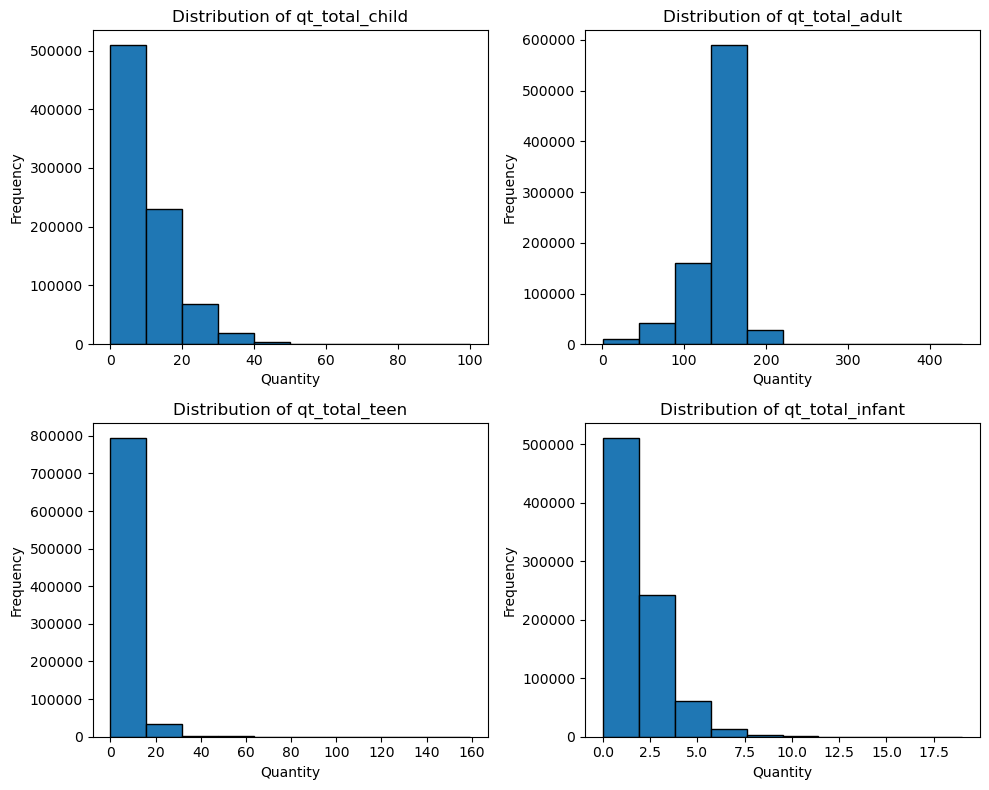

In [22]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].hist(data['qt_total_child'], bins=10, edgecolor='black')
axes[0, 0].set_title('Distribution of qt_total_child')
axes[0, 0].set_xlabel('Quantity')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(data['qt_total_adult'], bins=10, edgecolor='black')
axes[0, 1].set_title('Distribution of qt_total_adult')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(data['qt_total_teen'], bins=10, edgecolor='black')
axes[1, 0].set_title('Distribution of qt_total_teen')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(data['qt_total_infant'], bins=10, edgecolor='black')
axes[1, 1].set_title('Distribution of qt_total_infant')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
import seaborn as sns

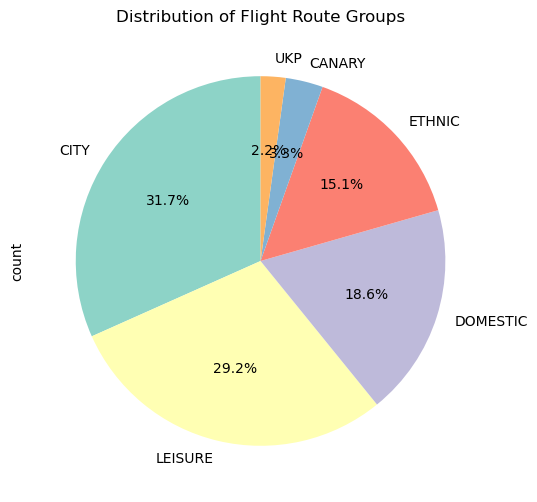

C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

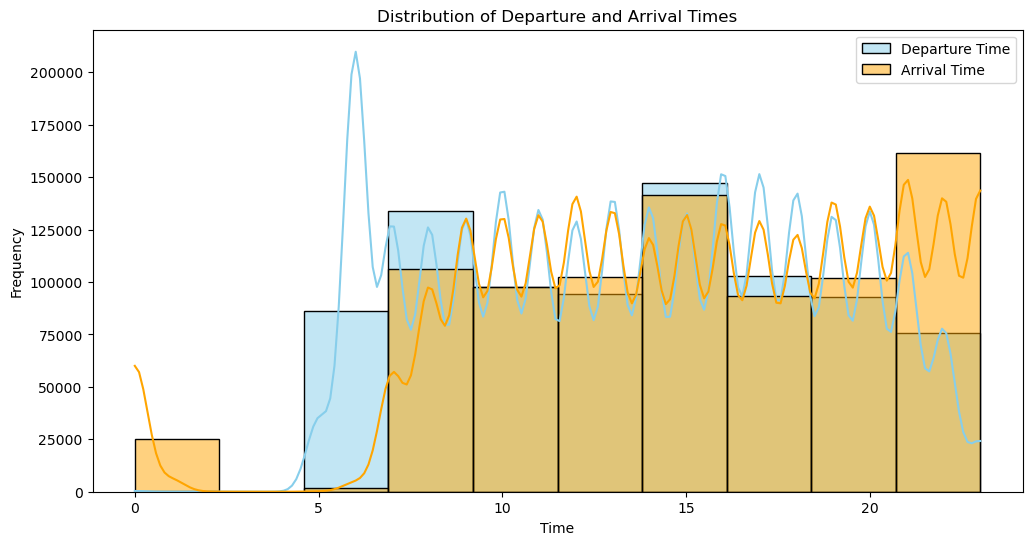

C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


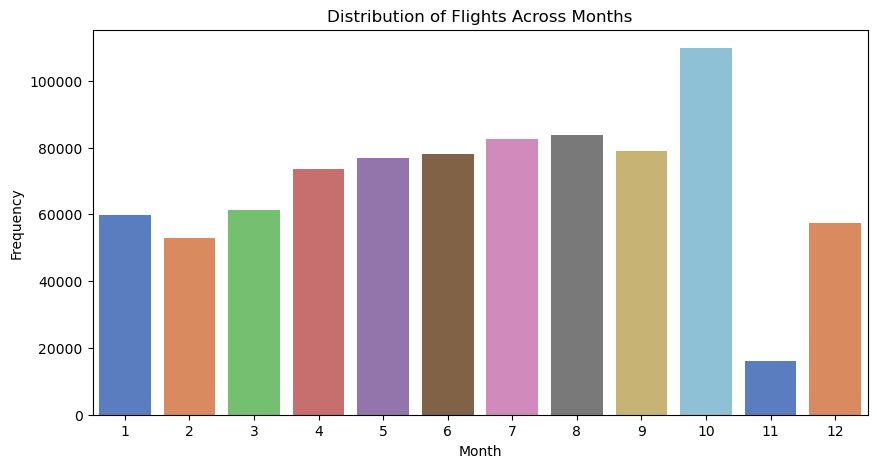

In [24]:
# Visualization 2: st_route_group
plt.figure(figsize=(8, 6))
data['st_route_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of Flight Route Groups')
plt.show()

# Visualization 4: qt_departure_local_time and qt_arrival_local_time
plt.figure(figsize=(12, 6))
sns.histplot(data['qt_departure_local_time'], bins=10, kde=True, color='skyblue', label='Departure Time')
sns.histplot(data['qt_arrival_local_time'], bins=10, kde=True, color='orange', label='Arrival Time')
plt.title('Distribution of Departure and Arrival Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Visualization 6: qt_month_departure
plt.figure(figsize=(10, 5))
sns.countplot(x='qt_month_departure', data=data, palette='muted')
plt.title('Distribution of Flights Across Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

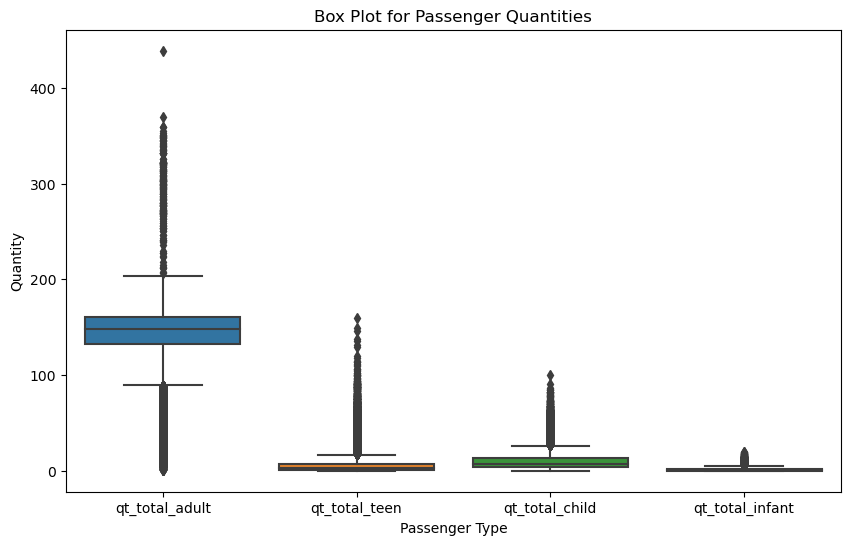

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['qt_total_adult', 'qt_total_teen', 'qt_total_child', 'qt_total_infant']])
plt.title('Box Plot for Passenger Quantities')
plt.xlabel('Passenger Type')
plt.ylabel('Quantity')
plt.show()


C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


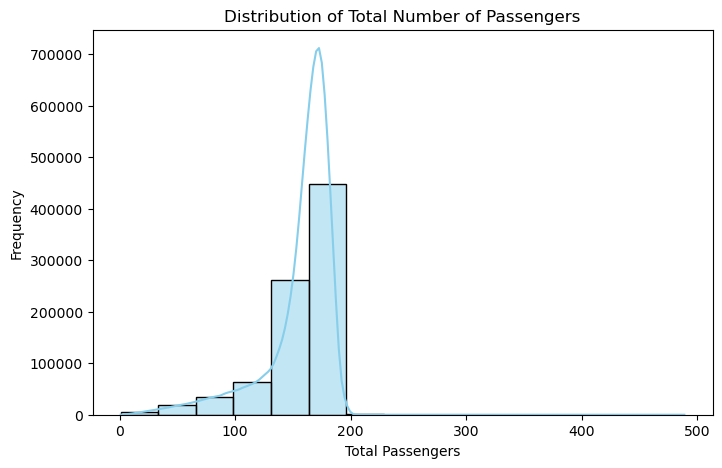

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(data['qt_total_passengers'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Total Number of Passengers')
plt.xlabel('Total Passengers')
plt.ylabel('Frequency')
plt.show()


C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

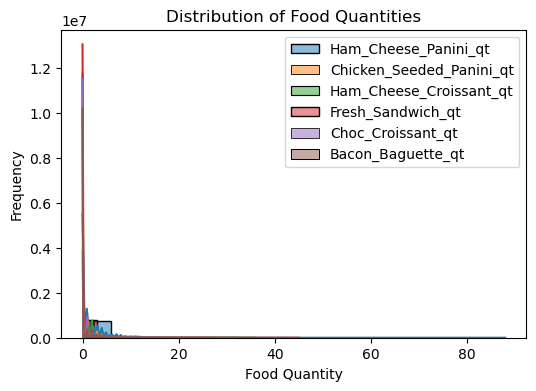

In [27]:
food_columns = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']
plt.figure(figsize=(6, 4))
for food_column in food_columns:
    sns.histplot(data[food_column], bins=15, kde=True, label=food_column)

plt.title('Distribution of Food Quantities')
plt.xlabel('Food Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

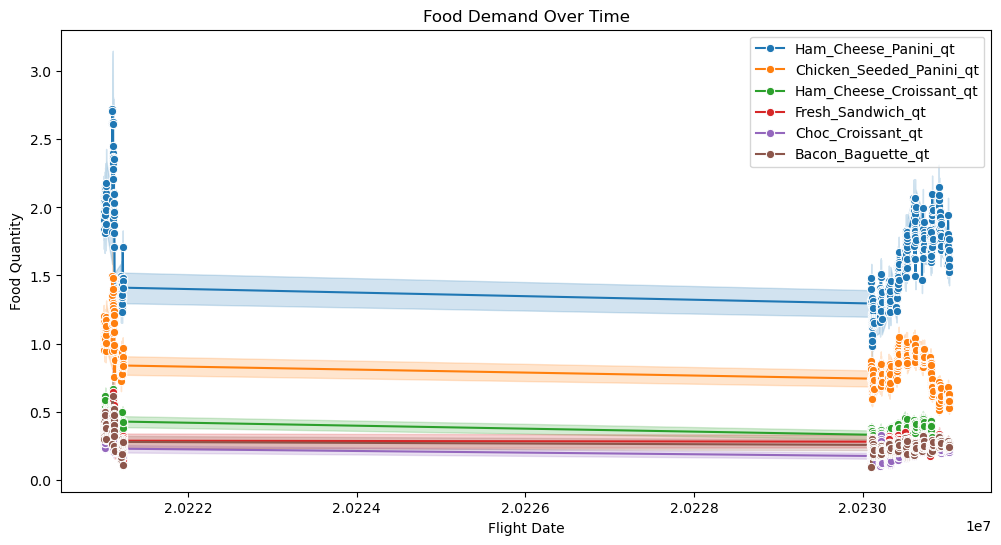

In [28]:
plt.figure(figsize=(12, 6))
for food_column in food_columns:
    sns.lineplot(x='dt_flight_date', y=food_column, data=data, marker='o', label=food_column)

plt.title('Food Demand Over Time')
plt.xlabel('Flight Date')
plt.ylabel('Food Quantity')
plt.legend()
plt.show()

In [29]:
data.drop(["DAY_OF_ORIGIN","DEP_SCHED_DT","ARR_SCHED_DT","dt_flight_date","DEP_SCHED_DT","ARR_SCHED_DT"], axis=1, inplace= True)
data.head()

C:\Users\emili\AppData\Local\Temp\ipykernel_11976\2315728027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["DAY_OF_ORIGIN","DEP_SCHED_DT","ARR_SCHED_DT","dt_flight_date","DEP_SCHED_DT","ARR_SCHED_DT"], axis=1, inplace= True)


,st_departure_airport,st_arrival_airport,st_route_group,qt_departure_local_time,qt_arrival_local_time,qt_flight_duration,qt_month_departure,qt_dayofweek_departure,qt_total_passengers,qt_total_adult,...,qt_total_3females_plus,qt_total_3malefemale_mixed,qt_total_rest_composition,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,BCN,MXP,CITY,18,20,105,7,6,183,168,...,1,3,14,10.0,2.0,2.0,0.0,0.0,0.0,0.0
1,DUB,CPH,CITY,6,9,130,3,3,150,146,...,1,3,21,-8.0,2.0,2.0,0.0,0.0,1.0,0.0
2,VNO,LBA,CITY,14,15,175,10,3,190,149,...,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FCO,PMI,LEISURE,6,8,105,9,3,169,159,...,1,9,26,-5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SVQ,RAK,ETHNIC,16,18,80,2,4,146,135,...,0,6,11,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
cat_columns = [col for col in data.select_dtypes(include=['object']).columns]
# Dictionary to hold the label mapping for each categorical column
label_mappings = {}
for cat_col in cat_columns:
    print(cat_col, f"{len(data[cat_col].unique())} categories")
    
    # Create a new encoder instance for each categorical column
    encoder = LabelEncoder()
    
    # Fit and transform the data, and replace in the dataframe
    data[cat_col] = encoder.fit_transform(data[cat_col])
    
    # Store the mapping of classes to labels for the current column
    label_mappings[cat_col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mappings

C:\Users\emili\AppData\Local\Temp\ipykernel_11976\1535716467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat_col] = encoder.fit_transform(data[cat_col])


st_departure_airport 239 categories
st_arrival_airport 240 categories


C:\Users\emili\AppData\Local\Temp\ipykernel_11976\1535716467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat_col] = encoder.fit_transform(data[cat_col])


st_route_group 6 categories


C:\Users\emili\AppData\Local\Temp\ipykernel_11976\1535716467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat_col] = encoder.fit_transform(data[cat_col])


{'st_departure_airport': {'AAL': 0,
  'AAR': 1,
  'ABZ': 2,
  'ACE': 3,
  'AGA': 4,
  'AGP': 5,
  'AHO': 6,
  'ALC': 7,
  'AMM': 8,
  'AMS': 9,
  'AOI': 10,
  'AQJ': 11,
  'ARN': 12,
  'ATH': 13,
  'BCN': 14,
  'BDS': 15,
  'BER': 16,
  'BFS': 17,
  'BGY': 18,
  'BHX': 19,
  'BIQ': 20,
  'BJV': 21,
  'BLL': 22,
  'BLQ': 23,
  'BNX': 24,
  'BOD': 25,
  'BOH': 26,
  'BOJ': 27,
  'BRE': 28,
  'BRI': 29,
  'BRQ': 30,
  'BRS': 31,
  'BRU': 32,
  'BSL': 33,
  'BTS': 34,
  'BUD': 35,
  'BVA': 36,
  'BVE': 37,
  'BZG': 38,
  'BZR': 39,
  'CAG': 40,
  'CCF': 41,
  'CDT': 42,
  'CFE': 43,
  'CFU': 44,
  'CGN': 45,
  'CHQ': 46,
  'CIA': 47,
  'CIY': 48,
  'CLJ': 49,
  'CPH': 50,
  'CRL': 51,
  'CRV': 52,
  'CTA': 53,
  'CUF': 54,
  'CWL': 55,
  'DBV': 56,
  'DLE': 57,
  'DLM': 58,
  'DRS': 59,
  'DTM': 60,
  'DUB': 61,
  'EDI': 62,
  'EFL': 63,
  'EGC': 64,
  'EIN': 65,
  'EMA': 66,
  'ESU': 67,
  'EXT': 68,
  'FAO': 69,
  'FCO': 70,
  'FEZ': 71,
  'FKB': 72,
  'FMM': 73,
  'FMO': 74,
  'FNC': 75

In [31]:
X = data.drop(['Ham_Cheese_Panini_qt',"Chicken_Seeded_Panini_qt","Ham_Cheese_Croissant_qt","Fresh_Sandwich_qt","Choc_Croissant_qt","Bacon_Baguette_qt"], axis=1)

In [32]:
columns = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt', 'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt', 'Bacon_Baguette_qt']
y = data[columns]

In [33]:
X.head()

,st_departure_airport,st_arrival_airport,st_route_group,qt_departure_local_time,qt_arrival_local_time,qt_flight_duration,qt_month_departure,qt_dayofweek_departure,qt_total_passengers,qt_total_adult,...,qt_total_bookings,qt_total_1male,qt_total_1female,qt_total_2males,qt_total_2females,qt_total_3males_plus,qt_total_3females_plus,qt_total_3malefemale_mixed,qt_total_rest_composition,dep_delay
0,14,133,1,18,20,105,7,6,183,168,...,90,35,19,6,5,7,1,3,14,10.0
1,61,50,1,6,9,130,3,3,150,146,...,90,31,29,2,3,0,1,3,21,-8.0
2,226,107,1,14,15,175,10,3,190,149,...,2,0,1,0,0,0,0,0,1,0.0
3,70,165,4,6,8,105,9,3,169,159,...,81,19,18,1,5,2,1,9,26,-5.0
4,195,173,3,16,18,80,2,4,146,135,...,50,12,16,0,5,0,0,6,11,4.0


In [34]:
y.head()

,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,2.0,2.0,0.0,0.0,0.0,0.0
1,2.0,2.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split( ##it gives back 4 arrays
    X, y,               # arrays or matrices I want to split
    test_size=0.3,      # the proportion to data for testing (if its an integer, how many rows do you want from the dataset)
    random_state=123,   # can be any number. make the split reproducibile
    shuffle=True, # if we want to shuffle data before splitting (this is good if we are not using time series)
)

# Display the sizes of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Testing set size:", y_test.shape)

Training set size: (581863, 32)
Testing set size: (249370, 32)
Training set size: (581863, 6)
Testing set size: (249370, 6)


In [36]:
Sscaler = StandardScaler()

Sscaler.fit(X_train)

x_train_sc = Sscaler.transform(X_train)
x_test_sc = Sscaler.transform(X_test)

In [37]:
data.sample(5)

,st_departure_airport,st_arrival_airport,st_route_group,qt_departure_local_time,qt_arrival_local_time,qt_flight_duration,qt_month_departure,qt_dayofweek_departure,qt_total_passengers,qt_total_adult,...,qt_total_3females_plus,qt_total_3malefemale_mixed,qt_total_rest_composition,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
891968,202,196,2,18,21,135,6,5,162,147,...,0,5,26,17.0,4.0,1.0,0.0,0.0,0.0,0.0
627286,186,173,3,22,23,135,7,7,169,119,...,1,5,15,50.0,0.0,0.0,0.0,0.0,0.0,0.0
70468,117,144,0,20,23,150,6,6,173,153,...,1,9,44,-1.0,4.0,0.0,0.0,0.0,0.0,0.0
359536,5,61,4,18,20,190,3,3,184,179,...,1,4,35,24.0,0.0,0.0,0.0,0.0,0.0,0.0
651708,224,128,4,22,0,130,3,4,168,158,...,1,6,14,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
model = RandomForestRegressor()

rf = RandomForestRegressor()

rf.fit(x_train_sc, y_train)

y_pred = rf.predict(x_test_sc)

## Choose one scoring 
RF_mae = mean_absolute_error(y_test, y_pred)

In [39]:
RF_mse = mean_squared_error(y_test, y_pred)

RF_mse 

RF_mae = mean_absolute_error(y_test, y_pred)
RF_mse = mean_squared_error(y_test, y_pred)
RF_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", RF_mae)
print("Mean Squared Error (MSE):", RF_mse)
print("R-squared (R²):", RF_r2)

Mean Absolute Error (MAE): 0.5922322185239753
Mean Squared Error (MSE): 1.375856620884664
R-squared (R²): 0.31652400283874704


In [40]:
RF_mae

0.5922322185239753

In [41]:
grid_rf = {
    #"n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 50],
   # "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [5, 10, 15],
    "max_features": [5,7,9], #SQUARED ROOT OF THE VARIABLES
   # "random_state": 5

}

In [ ]:
rs_rf = RandomizedSearchCV(
    estimator=rf,                               # this is the instantiated estimator object, that is, the model we want to tune
    param_distributions=grid_rf,    # this is the predefinad search space
    scoring="neg_mean_squared_error",                  # the metric we want the tuner calculates in order to select the best combination
    cv=5,                              # tººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººººhe cross-validation schema we want to use (same as in the "cross_validate" or "cross_val_score")
    n_jobs=-1,                         # this is to indicate the operative system to use all processor cores and speed up the process,
    n_iter=20                          # the number of attempts we want to perform
)

rs_rf.fit(x_train_sc, y_train)

In [ ]:
best_params_rf = rs_rf.best_params_

In [ ]:
best_rf = RandomForestRegressor(**best_params_rf)
best_rf.fit(x_train_sc, y_train)
best_data_mse = best_rf.predict(x_test_sc)
best_mse = mean_squared_error(best_data_mse, y_test)
best_mae = mean_absolute_error(y_test, y_pred)
best_r2 = r2_score(y_test, y_pred)

print(f"Initial Model: {RF_mae}, Best Model: {best_mae}")

print(f"Initial Model: {RF_mse}, Best Model: {best_mse}")

print(f"Initial Model: {RF_ r2}, Best Model: {best_r2}")

In [ ]:
data_nov = pd.read_csv("C:/Users/emili/Downloads/Term 2/Datathon/predict_november.csv/predict_november.csv")

In [ ]:
data_nov.head()

In [ ]:
data_nov.drop("qt_total_ski", axis = 1 , inplace = True)
data_nov.drop("qt_total_bike", axis = 1 , inplace = True)
data_nov.drop("qt_total_bulk", axis = 1 , inplace = True)
data_nov.drop("qt_total_music", axis = 1 , inplace = True)
data_nov.drop("qt_total_sportother", axis = 1 , inplace = True)
data_nov.drop("qt_total_bags", axis = 1 , inplace = True)
data_nov.drop("qt_total_golf", axis = 1 , inplace = True)
data_nov.drop("Lof_ID", axis = 1 , inplace = True)
data_nov.drop("st_flight_id", axis = 1 , inplace = True)
data_nov.drop("FN_NUMBER", axis = 1 , inplace = True)
data_nov.drop("AC_LOGICAL_NO", axis = 1 , inplace = True)
data_nov.drop("FN_CARRIER", axis = 1 , inplace = True)
data_nov.drop("Flight_n", axis = 1 , inplace = True)
data_nov.drop("st_route_subgroup", axis = 1 , inplace = True)
data_nov.drop("st_departure_city", axis = 1 , inplace = True)
data_nov.drop("st_arrival_city", axis = 1 , inplace = True)
data_nov.drop("st_departure_country", axis = 1 , inplace = True)
data_nov.drop("st_arrival_country", axis = 1 , inplace = True)
data_nov.drop("Base", axis = 1 , inplace = True)

null_count_per_row = data_nov.isnull().sum(axis=1)

# Filtrar las filas que tienen más de 11 columnas con valores nulos
rows_with_more_than_11_nulls = data_nov[null_count_per_row == 11]
print(rows_with_more_than_11_nulls.count())
rows_with_more_than_11_nulls

data_nov = data_nov.drop(rows_with_more_than_11_nulls.index)

In [ ]:
data_nov.drop(["DAY_OF_ORIGIN","DEP_SCHED_DT","ARR_SCHED_DT","dt_flight_date","DEP_SCHED_DT","ARR_SCHED_DT"], axis=1, inplace= True)

In [ ]:
cat_columns = [col for col in data_nov.select_dtypes(include=['object']).columns]
# Dictionary to hold the label mapping for each categorical column
label_mappings = {}
for cat_col in cat_columns:
    print(cat_col, f"{len(data[cat_col].unique())} categories")
    
    # Create a new encoder instance for each categorical column
    encoder = LabelEncoder()
    
    # Fit and transform the data, and replace in the dataframe
    data_nov[cat_col] = encoder.fit_transform(data_nov[cat_col])
    
    # Store the mapping of classes to labels for the current column
    label_mappings[cat_col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mappings

In [ ]:
data_nov = data_nov.dropna()

In [ ]:
Sscaler = StandardScaler()

Sscaler.fit(data_nov)

data_nov_sc = Sscaler.transform(data_nov)

In [ ]:
data_nov_sc.shape

In [ ]:
y_pred_nov = best_rf.predict(data_nov_sc)

In [ ]:
y_pred_nov.shape

In [ ]:
pd.DataFrame(y_pred_nov).to_csv("C:/Users/emili/Downloads/Term 2/Datathon/predict_november.csv/predictions_RF.csv")